In [4]:
import os
from utils import plot_stepsizes_and_zetas, extract_params_from_dirname, extract_metrics_from_dir, get_best_experiments, filter_experiments, filter_experiments_flexible
import concurrent.futures
from tqdm import tqdm
import pandas as pd
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# Read CSV

In [ ]:
sa_sgld_10 = pd.read_csv('tables/sa-sgld_cifar10.csv')
sa_sgld_new_10 = pd.read_csv('tables/sa-sgld_new_cifar10.csv')
sgld_10 = pd.read_csv('tables/sgld_cifar10.csv')
#sghmc_10 = pd.read_csv('tables/sghmc_cifar10.csv')
#sa_sghmc_10 = pd.read_csv('tables/sa-sghmc_cifar10.csv')
#sa_sgld_100 = pd.read_csv('tables/sa-sgld_cifar10.csv')
#sgld_100 = pd.read_csv('tables/sgld_cifar10.csv')
#sghmc_100 = pd.read_csv('tables/sghmc_cifar10.csv')
#sa_sghmc_100 = pd.read_csv('tables/sa-sghmc_cifar10.csv')
#psgld_10 = pd.read_csv('tables/psgld_cifar10.csv')

# Evaluations

In [20]:
sgld_10

,number,Acc,NLL,ECE,OOD_AUC
0,0.010,93.68,0.216553,1.259726,66.757153
1,0.020,94.33,0.192942,3.181840,67.935282
2,0.030,94.68,0.185236,3.703542,66.144982
3,0.040,94.88,0.179945,4.064950,67.720251
4,0.050,94.46,0.215459,7.057476,66.565657
5,0.055,94.90,0.222334,8.462496,66.406302
6,0.060,94.67,0.224322,8.361024,66.128901
7,0.063,95.07,0.201680,6.758205,66.905280
8,0.070,95.24,0.198020,6.807843,67.797459
9,0.075,94.69,0.237430,9.344480,66.608441


In [ ]:
# Using the flexible interface
filtered = filter_experiments_flexible(
    sa_sgld_new_10,
    hyperparameters={'M': 2.},
    results={'ECE': ('<', 5.), 'NLL': ('<', 0.19), 'Acc': ('>', 94.75), 'OOD_AUC': ('>', 68.)}
    #stepsize_mean=0.025
)
filtered

,alpha,dtau,Omega,m,M,r,Acc,NLL,ECE,OOD_AUC,Min Mean Max Std Stepsize,Min Mean Max Std Zeta,_step_sizes,_batch_idx,_zetas,_zeta_batch_idx
14,10.0,0.10,0.1,0.02,2.0,0.500,95.07,0.184295,4.705073,68.446619,0.0162 0.0598 0.1413 0.0116,0.0000 0.0028 0.0670 0.0016,"[0.029309624806046486, 0.020360197871923447, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.015625959262251854, 0.0382922105491161...","[-781, -780, -779, -778, -777, -776, -775, -77..."
26,100.0,0.05,1.0,0.02,2.0,0.375,94.81,0.181547,4.232627,68.346646,0.0098 0.0331 0.0856 0.0099,0.0000 0.0004 0.0147 0.0003,"[0.016836870461702347, 0.015142246149480343, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.002455333946272731, 0.0035038194619119...","[-781, -780, -779, -778, -777, -776, -775, -77..."
53,0.1,0.05,1.0,0.02,2.0,0.375,94.78,0.173832,2.991685,68.422501,0.0218 0.0289 0.0585 0.0020,0.0000 0.0004 0.0010 0.0001,"[0.05851731449365616, 0.0503910668194294, 0.04...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 1.2329028322710656e-05, 2.98202139674685...","[-781, -780, -779, -778, -777, -776, -775, -77..."
77,100.0,0.10,0.1,0.02,2.0,0.375,94.99,0.180477,4.273936,68.573748,0.0096 0.0361 0.1535 0.0140,0.0000 0.0036 0.1603 0.0030,"[0.016684027388691902, 0.013355019502341747, 0...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.02471878007054329, 0.05147810652852058...","[-781, -780, -779, -778, -777, -776, -775, -77..."
227,50.0,0.05,0.1,0.02,2.0,0.500,95.00,0.173626,3.595357,69.015306,0.0061 0.0296 0.0862 0.0108,0.0000 0.0040 0.1346 0.0034,"[0.01260374579578638, 0.010675783269107342, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.022690769284963608, 0.0340899415314197...","[-781, -780, -779, -778, -777, -776, -775, -77..."
239,50.0,0.10,0.5,0.02,2.0,0.375,95.15,0.180450,4.574208,69.098523,0.0179 0.0570 0.1562 0.0151,0.0000 0.0006 0.0195 0.0004,"[0.02735208347439766, 0.0218451377004385, 0.02...","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.004910667892545462, 0.0102595798671245...","[-781, -780, -779, -778, -777, -776, -775, -77..."
248,50.0,0.10,2.0,0.02,2.0,0.250,94.86,0.168842,2.921536,68.459258,0.0137 0.0351 0.1018 0.0089,0.0000 0.0002 0.0103 0.0002,"[0.02111353725194931, 0.018174126744270325, 0....","[-781, -780, -779, -778, -777, -776, -775, -77...","[0.0, 0.001227625529281795, 0.0025554036255925...","[-781, -780, -779, -778, -777, -776, -775, -77..."


In [ ]:
plot_stepsizes_and_zetas(sa_sgld_10, M=[10.], alpha=[5.], dtau=[0.01], omega=[0.1], r=[0.25])


Matched rows:
        M  alpha  dtau  Omega     r    Acc       NLL       ECE    OOD_AUC
77   2.0  100.0   0.1    1.0  0.25  94.62  0.186530  3.941185  66.893471
125  2.0   50.0   0.1    1.0  0.25  94.72  0.185971  4.028491  69.043422
213  2.0    1.0   0.1    1.0  0.25  94.72  0.170452  2.345744  67.906903
228  2.0    0.1   0.1    1.0  0.25  94.52  0.195827  4.527298  66.266520
229  2.0   10.0   0.1    1.0  0.25  94.48  0.182365  3.356807  67.563465
Parsing data...


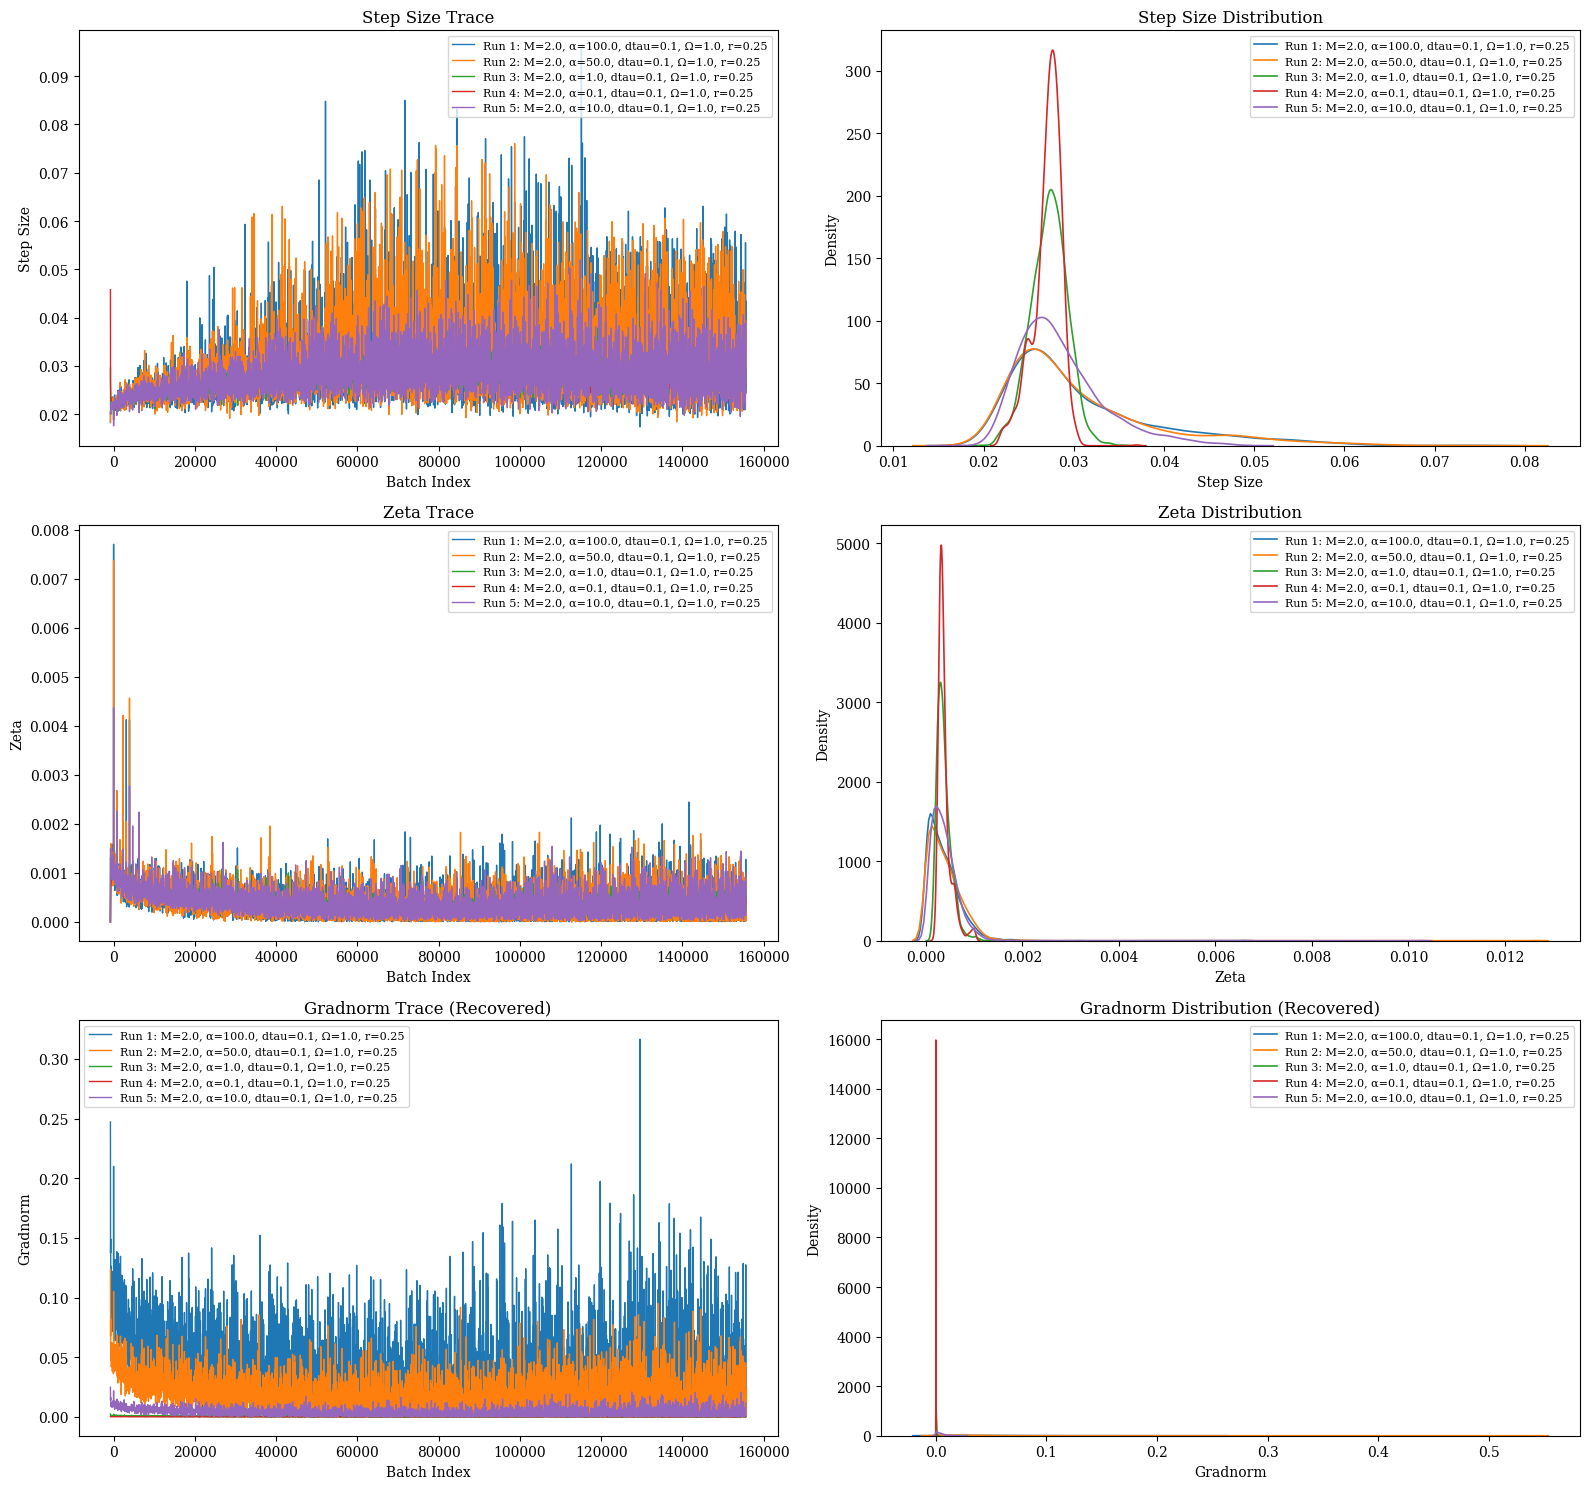

In [18]:
plot_stepsizes_and_zetas(sa_sgld_new_10, M=[2.], alpha=[100. ,  10. ,   1. ,   0.1,  50.], dtau=[0.1], omega=[1.], r=[0.25])

In [7]:
sa_sgld_new_10.Omega.unique()

array([0.5, 0.1, 1. , 2. ])


Matched rows:
        M  alpha  dtau  Omega     r    Acc       NLL       ECE    OOD_AUC
70   2.0   50.0  0.02    1.0  0.25  92.66  0.244473  0.913183  66.296888
125  2.0   50.0  0.10    1.0  0.25  94.72  0.185971  4.028491  69.043422
205  2.0   50.0  0.01    1.0  0.25  91.06  0.293521  1.050912  64.843210
236  2.0   50.0  0.05    1.0  0.25  94.03  0.184794  1.098815  67.917710
Parsing data...


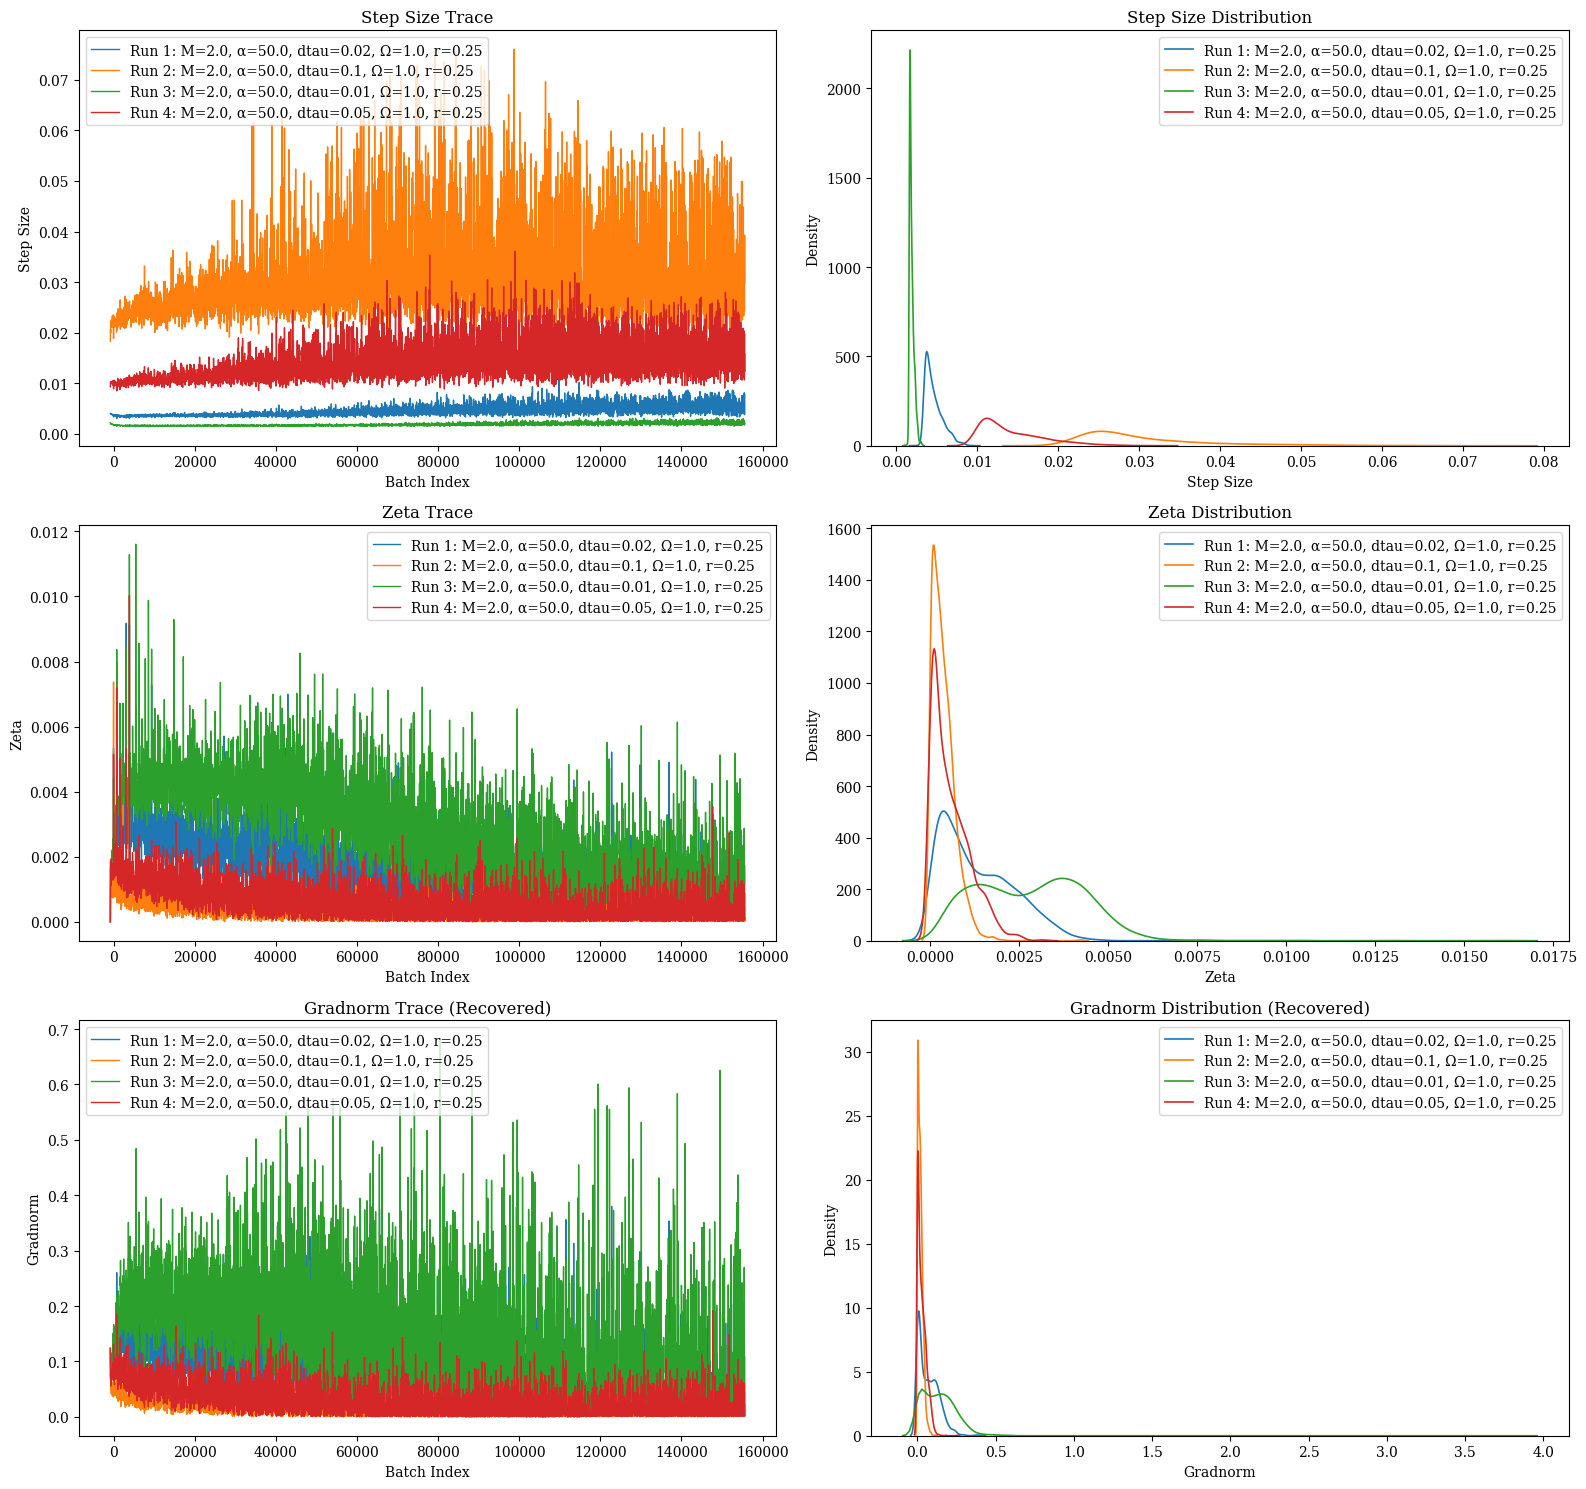

In [6]:
plot_stepsizes_and_zetas(sa_sgld_new_10, M=[2.], alpha=[50.], dtau=[0.02, 0.05, 0.1 , 0.01], omega=[1.], r=[0.25])


Matched rows:
        M  alpha  dtau  Omega      r    Acc       NLL       ECE   OOD_AUC
206  2.0   50.0  0.02    1.0  0.500  94.82  0.175849  3.539667  67.91565
208  2.0   50.0  0.02    1.0  0.375  94.93  0.170659  2.231458  68.27245
Parsing data...


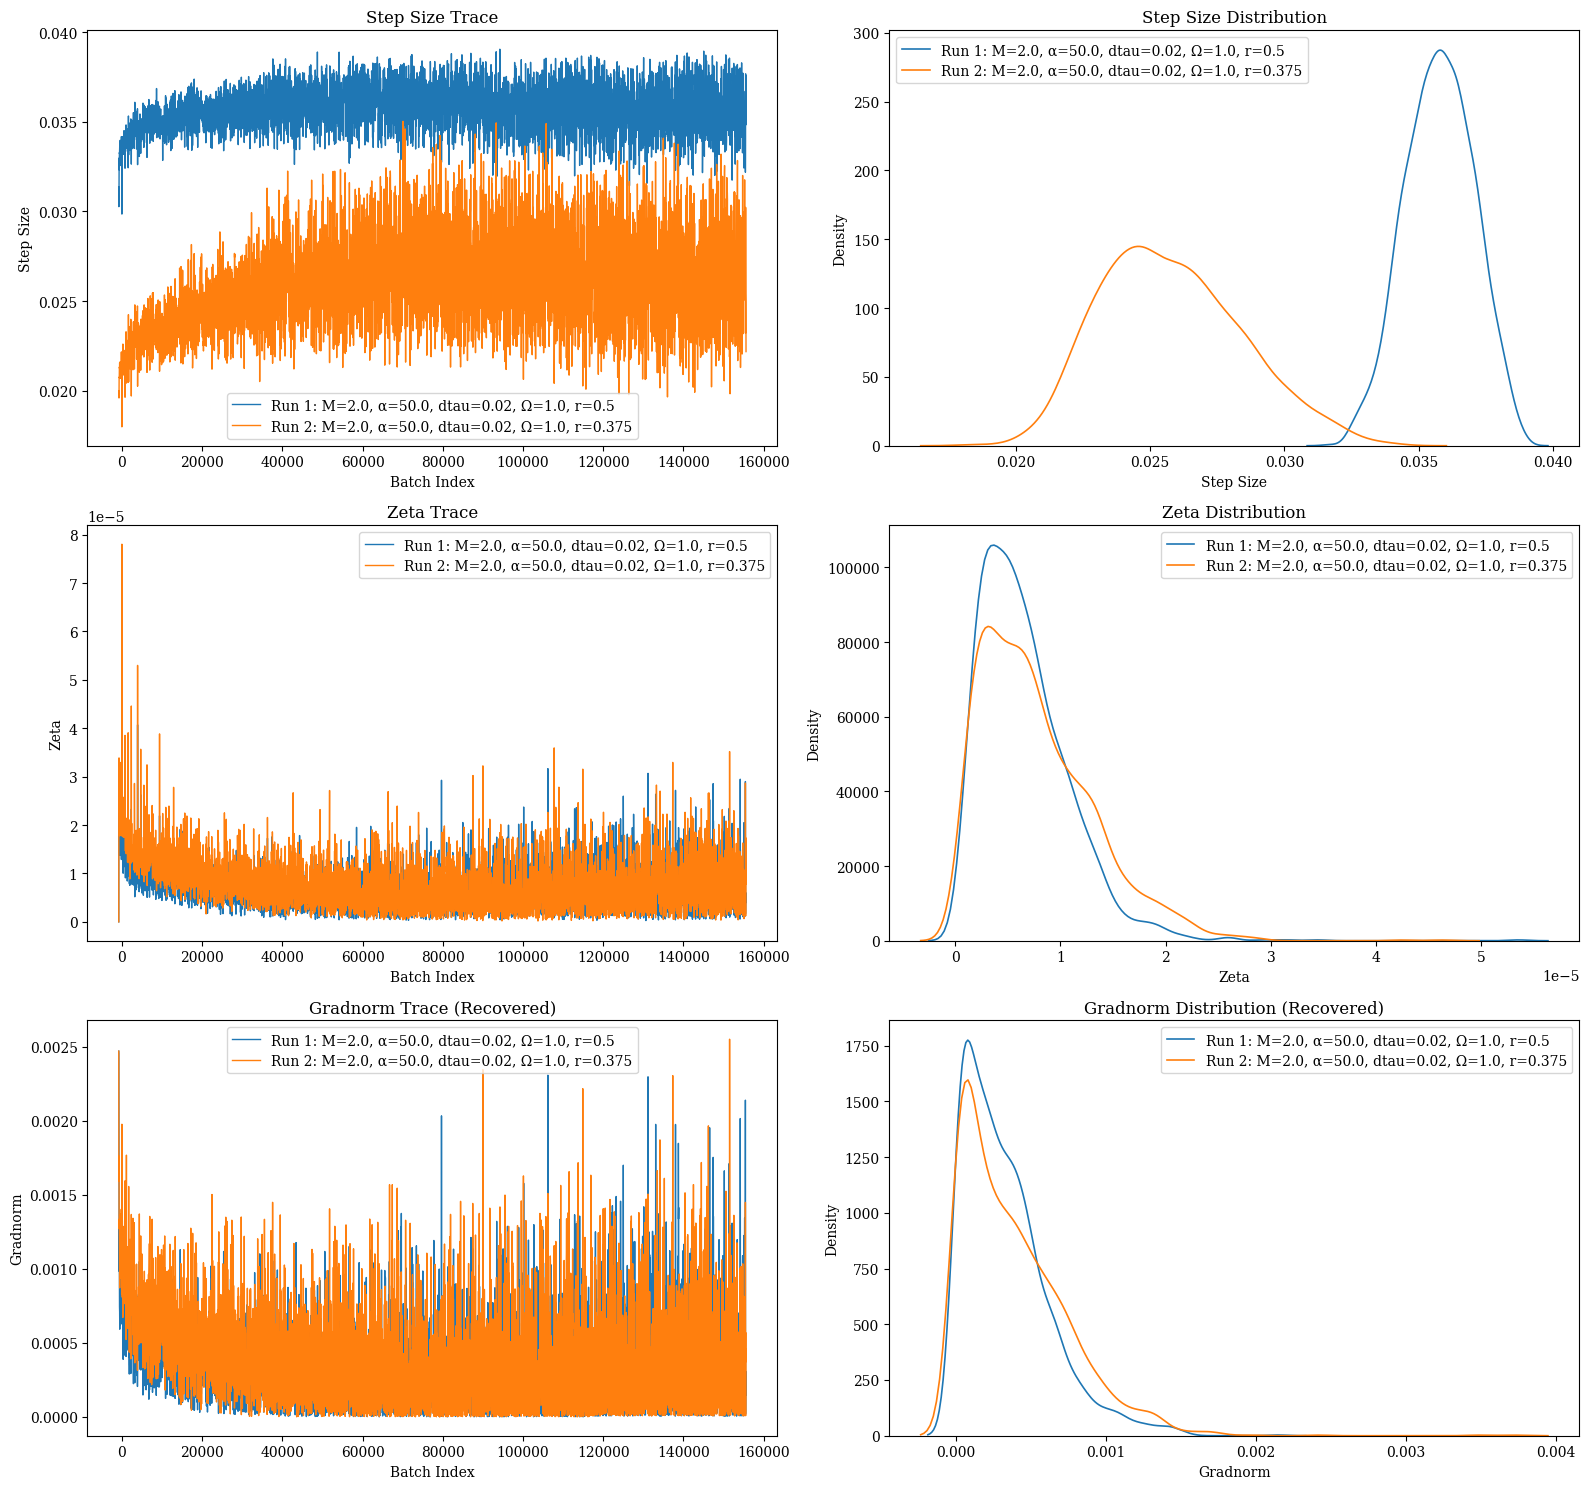

In [ ]:
plot_stepsizes_and_zetas(sa_sgld_10, M=[2.], alpha=[50.], dtau=[0.02], omega=[1.], r=[0.375, 0.5])

In [1]:
from utils import extract_metrics_from_dir

extract_metrics_from_dir("./cifar/ckpt_sgld/sa-sgld_new/S1")